# 필요 라이브러리 불러오기

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [9]:
data = pd.read_csv('./data/ml_data/boston.csv')

In [10]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 군집화

군집화를 통해서 비슷한 성향을 가진 그룹을 찾아보자.

In [11]:
# 범주형 데이터 제거
del data['chas']

In [12]:
# 나중에 비교를 위한 medv 컬럼도 복사 후 제거

medv = data['medv']
del data['medv']

In [13]:
# 군집화를 진행하기에 앞서 수월한 시각화 및 설명력을 첨부하기 위하여 PCA를 통해 변수를 2개로 압축.
# 필요 라이브러리를 불러오기.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# 정규화 진행
# 객체 생성
scaler = StandardScaler()

In [15]:
# 데이터 학습
scaler.fit(data)
# 변환
scaler_data = scaler.transform(data)

In [16]:
# 객체 생성
pca = PCA(n_components = 2)

In [17]:
# PCA 학습시키기
pca.fit(scaler_data)

PCA(n_components=2)

In [18]:
# 결과값 확인
pca.transform(scaler_data)

array([[-2.09723388, -0.72017904],
       [-1.456003  , -0.94769427],
       [-2.07345404, -0.62533575],
       ...,
       [-0.31128314, -1.39524641],
       [-0.26939083, -1.35059004],
       [-0.12452556, -1.34293829]])

In [19]:
# 데이터 프레임 형태로 변환
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns = ['pc1', 'pc2'])
data2.head()

,pc1,pc2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


# 몇 개로 군집화를 해야할까?

- 위의 데이터를 몇 개의 군집화로 나누는것이 가장 올바른 군집화인지 살펴보자

`KMeans(n_cluster = k)`

- k개의 군집화를 하겠다는 객체 생성

`Kmeans.fit()`

- 학습시키기

`KMeans.inertia_`

- 학습된 KMeans의 응집도를 확인
- 응집도란 각 데이터로부터 자신이 속한 군집의 중심까지의 거리를 의미
- 즉, 낮을수록 군집화가 더 잘되어있음.

`KMeans.predict(data)`

- 학습된 데이터를 바탕으로 데이터를 변환시켜줌

In [20]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

In [21]:
x = []  # K가 몇 개인지
y = []  # 응집도가 몇인지

for k in range(1, 30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    
    x.append(k)
    y.append(kmeans.inertia_)

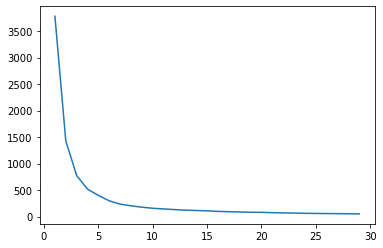

In [22]:
# 그래프 그리기
plt.plot(x, y)

# ELBOW POINT 4 지정 후 클러스터링 시작

In [23]:
kmeans = KMeans(n_clusters = 4)

In [24]:
kmeans.fit(data2)

KMeans(n_clusters=4)

In [25]:
data2['labels'] = kmeans.predict(data2)

In [26]:
data2.head()

,pc1,pc2,labels
0,-2.097234,-0.720179,0
1,-1.456003,-0.947694,0
2,-2.073454,-0.625336,0
3,-2.610161,-0.134044,0
4,-2.456866,-0.229919,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

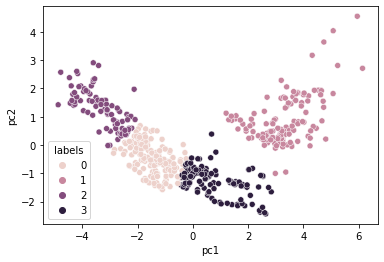

In [27]:
sns.scatterplot(data = data2, x = 'pc1', y = 'pc2', hue = 'labels')

# 클러스터링 결과 해석하기

pca와 클러스터링을 통해 결과를 해석해봅시다.

가장 먼저 어떠한 그룹이 집 값이 높은지 평균을 비교합니다.

In [34]:
# 맨 처음 떼어 두었던 medv 컬럼을 추가합니다.
data2['medv'] = medv
data2.head()

,pc1,pc2,labels,medv
0,-2.097234,-0.720179,0,24.0
1,-1.456003,-0.947694,0,21.6
2,-2.073454,-0.625336,0,34.7
3,-2.610161,-0.134044,0,33.4
4,-2.456866,-0.229919,0,36.2


In [35]:
# 먼저 label이 0인 것들의 평균 집값 보기
data2[data2['labels']==0]['medv'].mean()
# data2에서 [lavels가 0인 것들의] 집값.평균()

26.07857142857143

In [36]:
# 시각화를 위해 각 그룹별 medv값을 따로 변수로 생성.
medv_0 = data2[data2['labels']==0]['medv'].mean()
medv_1 = data2[data2['labels']==1]['medv'].mean()
medv_2 = data2[data2['labels']==2]['medv'].mean()
medv_3 = data2[data2['labels']==3]['medv'].mean()

<AxesSubplot:>

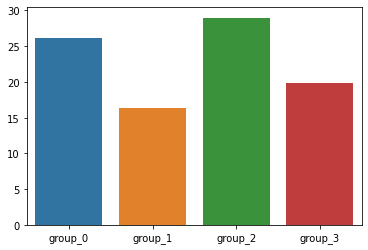

In [37]:
# 주의! 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 '랜덤'임을 잊지 말 것
sns.barplot(x = ['group_0', 'group_1', 'group_2', 'group_3'], y = [medv_0, medv_1, medv_2, medv_3])


# 그룹들의 특징을 살펴보자

최상위 그룹과 최하위 그룹의 특징을 살펴보며 집 값이 높은 이유 혹은 집 값이 낮은 이유에 대해서 살펴보겠습니다.

### 최상위층 - 2번그룹
### 최하위층 - 1번그룹

In [40]:
# 원본 데이터에 라벨을 복제합니다.
data['labels'] = data2['labels']

In [42]:
# 각 그룹의 데이터를 나누어서 변수에 담습니다.
group = data[(data['labels']==1) | (data['labels']==2)]

In [46]:
group.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,2
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,2
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,2
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,2
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,2


In [49]:
# 변수에 1번과 2번 그룹을 묶어서 인덱스로 보내준다. group.groupby('labels').mean()
# dlgn reset_index로 다시 컬럼으로 보내주고 다시 변수에 담는다.
group = group.groupby('labels').mean().reset_index()

In [50]:
group.head()

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,2,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


# 시각화를 위한 subplot

`plt.subplots(행, 열, figsize=())`

여러가지의 그림을 그리는 방법.

<AxesSubplot:xlabel='labels', ylabel='crim'>

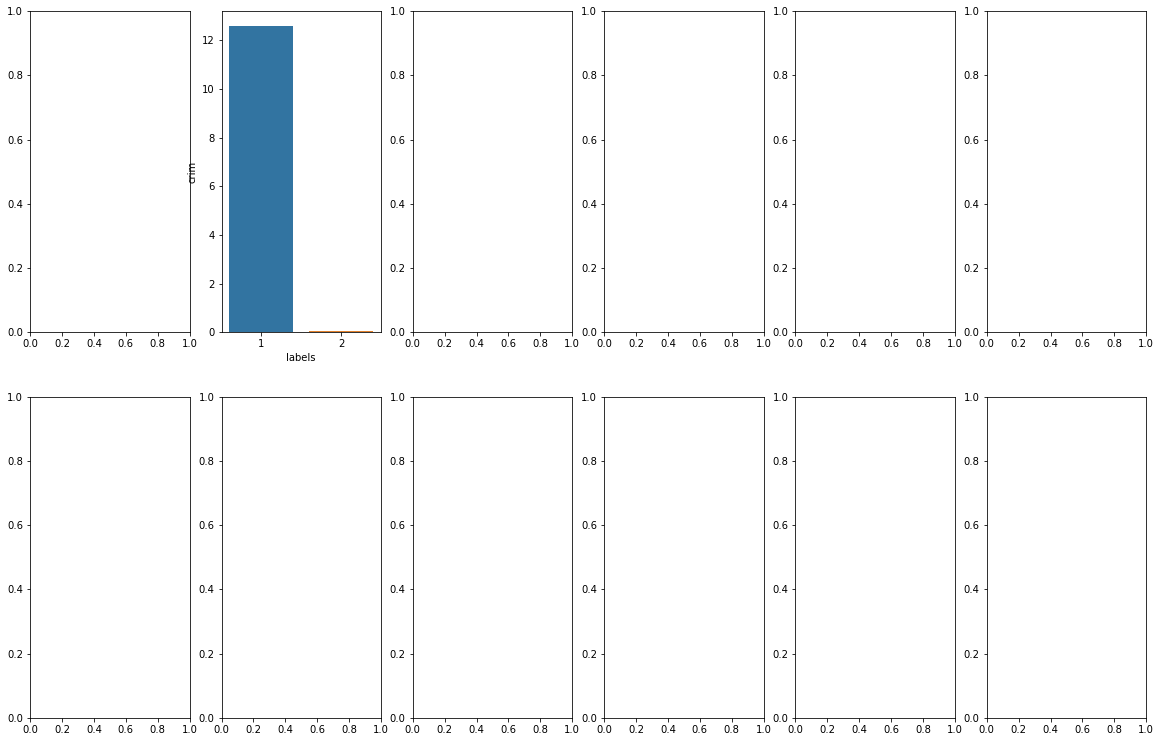

In [52]:
f, ax = plt.subplots(2, 6, figsize=(20, 13))

# ax는 그래프의 위치를 나타낸다. ax[0,1]은 0번째(첫번째)행이면서 첫번재 열
sns.barplot(data = group, x='labels', y='crim', ax = ax[0,1])

In [55]:
column = group.columns
column

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

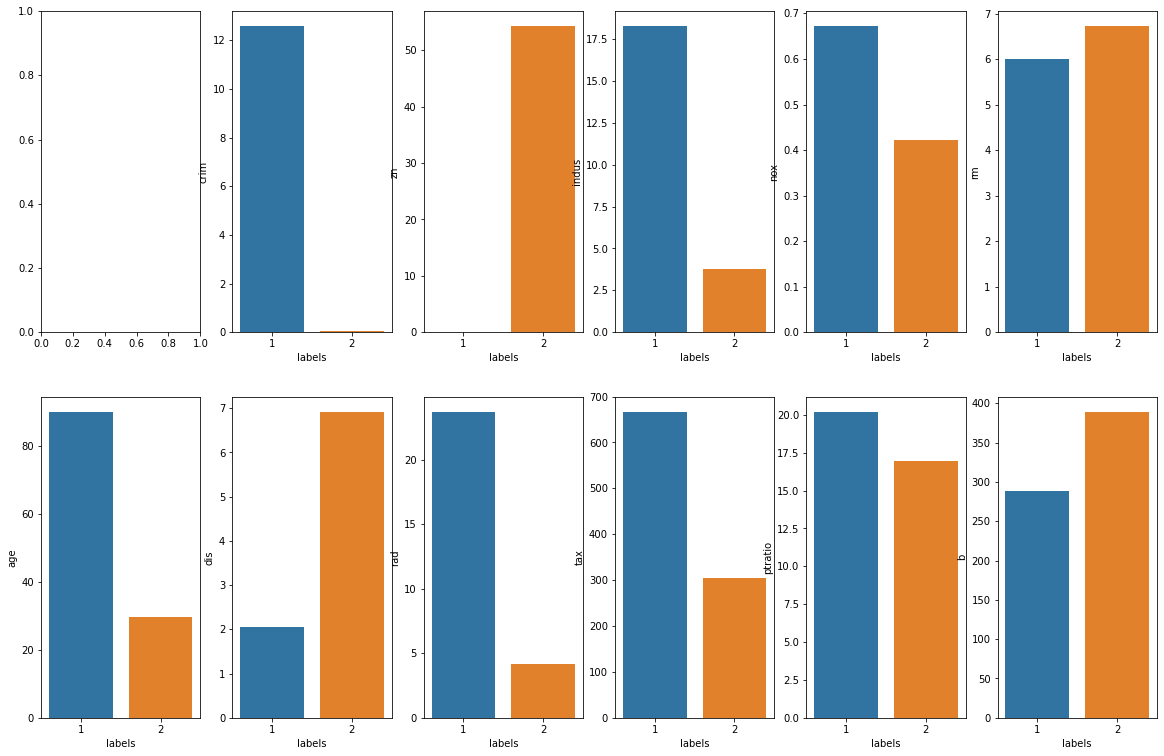

In [57]:
# 반복문을 이용해서 그래프를 쉽게 그리자.

f, ax = plt.subplots(2, 6, figsize=(20, 13))

for i in range(1, 12) :
    sns.barplot(data = group, x = 'labels', y = column[i], ax = ax[i//6, i%6])
    # ax는 열의 개수만큼 이 공식대로 하면 0부터 차례로 번호를 넣을 수 있다!  //는 나누기, %는 나머지

1번 그룹 : 집 값이 낮은 곳
2번 그룹 : 집 값이 높은 곳

# 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 25,000 평방피트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있습니다다.

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징들을 살펴볼 수 있습니다.

더 나아가 이번 시간에는 배우지 않지만 레이더차트라는것을 이용해서 그래프를 그린다면 더 깔끔한 시각화로 나타낼 수 있을 것 입니다.